 <h1><center> Discussing the Covid19 Pandemic </center></h1>
  <h2><center> Tweet Exploratory Data Analysis </center></h2>

**Student: Shreyas Chitransh     
Course: BrainStation DataScience and AI Bootcamp  
Project: Capstone
Notebook: Part 2 of 4    
Previous Notebook: Part 1 - Data Loading, Cleaning and Exploratory Data Analysis   
Next Notebook: Part 3 - Topic Modeling Book 1**


## Introduction

In part 1 of the report, the overall data was imported and cleaned and an Exploratory Data Analysis (EDA) performed which assisted us in reducing down the dataset to a manageable size. This cleaned dataset was exported at the end of part 1 and here, in part 2, it will now be imported in order to conduct an  [EDA of the Tweet text](#3).  The Tweet text EDA will assist us in doing text preprocessing for model building in parts 3 and 4.

## Importing the Data Subset  <a id="1"></a>

In the end of the last section, the final analysis dataframe was exported as `analysis_df`. This will now be imported and checked to ensure there are no errors with the data. 

The first step is to import all modules and libraries which will be used in this part of the project. Then the dataframe will be imported.

In [1]:
# Import the relevant libraries and modules which will be utilized in the overall report
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from collections import defaultdict
from collections import Counter
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shch9\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Now the data will be imported below. 

In [2]:
# Import the data
analysis_df= pd.read_csv(r'data\analysis_df.csv', index_col=0)

Let's have a look at our data.

In [3]:
# Check the first 5 rows of the dataframe
analysis_df.head()

,created_at,screen_name,text,is_retweet,favourites_count,retweet_count,followers_count,friends_count,verified
0,2020-03-29 00:00:00+00:00,rlieving,“People are just storing up. They are staying ...,False,604,0,136,457,False
1,2020-03-29 00:00:11+00:00,wgbhnews,Dez-Ann Romain was a beloved school principal....,False,2200,2,32264,5029,True
2,2020-03-29 00:00:30+00:00,FortesHealth,As part of your everyday #prevention actions c...,False,5,0,2,10,False
3,2020-03-29 00:01:01+00:00,LinnieElle,@realDonaldTrump #Trump please #ResignNowtrump...,False,107402,0,4291,4755,False
4,2020-03-29 00:01:38+00:00,TomStrudwick93,I don’t think we realised how good we had it b...,False,4805,0,337,398,False


Let's check to see the structure of the dataframe.

In [4]:
# Check the structure of the of the dataframe to ensure it is correct
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81333 entries, 0 to 81332
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   created_at        81333 non-null  object
 1   screen_name       81333 non-null  object
 2   text              81333 non-null  object
 3   is_retweet        81333 non-null  bool  
 4   favourites_count  81333 non-null  int64 
 5   retweet_count     81333 non-null  int64 
 6   followers_count   81333 non-null  int64 
 7   friends_count     81333 non-null  int64 
 8   verified          81333 non-null  bool  
dtypes: bool(2), int64(4), object(3)
memory usage: 5.1+ MB


We can see that the dataframe contains 9 columns and over 81,000 rows. Now that we have ensured that our data is correctly imported, let's conduct some Tweet EDA.

## Tweet Exploratory Data Analysis <a id="3"></a>

The numerical columns are cleaned and sorted; now the focus will be to clean the Tweets present in the `'text'` column while doing an EDA. In an NLP project, this is one of the vital processes as the text data is the main input. The cleaning will involve removing all unneccessary data from the text, such as stop words, that might skew the modeling results.
Let's start by checking the first few lines of the Tweet text. 

In [5]:
analysis_df["text"].head()

0    “People are just storing up. They are staying ...
1    Dez-Ann Romain was a beloved school principal....
2    As part of your everyday #prevention actions c...
3    @realDonaldTrump #Trump please #ResignNowtrump...
4    I don’t think we realised how good we had it b...
Name: text, dtype: object

As the text is quite long, it does not display the full text, however we can be assured that the column does contain text data, which is sufficient information for us to move to the next step. 

For our first graphical EDA method, we will be plotting the distribution of the number of words in Tweets for the whole dataset. This will be done by separating each Tweet into separate words and then counting the number of words within it. This is plotted below.  <a id="4"></a>

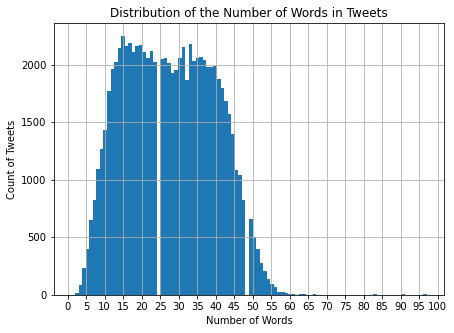

In [6]:
# Separate each word within a Tweet 
separate_words = analysis_df['text'].str.split()

# Count the number of words in each Tweet
num_of_words = separate_words.map(lambda x: len(x))

# Create a variable which contains the range to show the appropriate spread of x-axis
ticks = np.arange(0, 105, 5)

# Improve plot comprehensiveness
plt.figure(figsize=(7,5))
plt.hist(num_of_words, bins=100)
plt.xlabel('Number of Words')
plt.ylabel('Count of Tweets')
plt.title('Distribution of the Number of Words in Tweets')
plt.xticks(ticks)

# call a grid to improve legibility
plt.grid()
plt.show()

We can see that majority of the Tweets range from 5 to 55 with most of them ranging from 15 to 35 words. Though there seem to be some outliers that are almost double that. Surprisingly, there weren't any Tweets with 24 and 48 words.

A Tweet is limited by the number of characters that can be used in it. So below we will check the distribution of the number of characters in the Tweets.  <a id="5"></a>

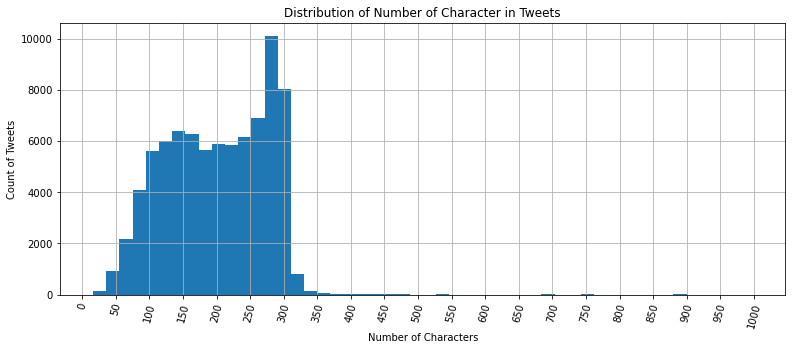

In [7]:
# Checking the length (number of characters) for each Tweet 
char_len = analysis_df['text'].str.len()

# Create a variable which contains the range to show the appropriate spread of x-axis
ticks = np.arange(0,1050,50)

# Improve plot comprehensiveness
plt.figure(figsize=(13,5))
plt.hist(char_len, bins=50)
plt.xlabel('Number of Characters')
plt.ylabel('Count of Tweets')
plt.title('Distribution of Number of Character in Tweets')
plt.xticks(ticks, rotation=75)

# call a grid to improve legibility
plt.grid()
plt.show()

The character limit for Tweets is 280 characters; we can see that majority of the Tweets are below 280 characters and the highest count of Tweets are at 280 characters or just below. However, it is obvious that there are Tweets with over 280 characters present in this distribution. Let's check what the longer Tweets contain. We will make a subset dataframe that contains Tweets with over 450 characters and check the results.  

In [8]:
#Creating subset with higher character counts
over_450 = char_len >450

Let's check the number of Tweets which have over 450 characters and their index. 

In [9]:
#Check index of Tweets that have high character counts
char_len[over_450]

179      889
1475     872
2448     482
9465     650
11917    464
        ... 
79575    749
79750    921
80767    485
80851    858
81178    917
Name: text, Length: 76, dtype: int64

We will check one of the Tweets below. We have selected index 79750 as it shows a character count of 921. 

In [10]:
# Using iloc on a dataframe row to check the Tweet
analysis_df.iloc[79750]

created_at                                  2020-04-30 07:15:17+00:00
screen_name                                           PhillyComptonMW
text                @laurasessions10 @SusanBordo @Sammysgranny @su...
is_retweet                                                      False
favourites_count                                                31740
retweet_count                                                       0
followers_count                                                  1966
friends_count                                                    1034
verified                                                        False
Name: 79750, dtype: object

It's apparent that the Tweet contains some 'mentions' using `@`, however we are unable to see the full text of the Tweet. Let's isolate the Tweet text check it below. 

*Note: that a 'mention' in Twitter is when a user intends to bring the attention of another user or entity by specifically using `@` followed by the user or entity Twitter account name.* <a id="6"></a>

In [11]:
# Using iloc on a dataframe column to check the full data
analysis_df['text'].iloc[79750]

'@laurasessions10 @SusanBordo @Sammysgranny @suewashko @bannerite @grammy4lphhl @kjoerwin @SophieInCT @WPalmerCurl @messerjs @PuestoLoco @MooPersists @Retinalia @doctordill3 @letat_lechat @NWMouzer @KayTweetTweet @last_person_on_ @morgfair @veedubyoo @m33gs @workingtrucker @goprapebuster @PodcastObsessed @BrindaStar @ginadem @Bellarealness @AHamiltonSpirit @co_rapunzel4 @NaphiSoc @EricWolfson @TheBaxterBean @Pandeism @Bvweir @TheWomensWatch @RonSupportsYou @admiralmpj @linksteroh @tedlieu @SenWarren @judapeters @ColtSTaylor @kalpenn @JohnWesleyShipp @jonfavs @ProudResister @JuliaLikesFrogs @TheDailyShow @crzyfkinworld @Starz_Wayne Trump &amp; Republicans: What virus? https://t.co/W1QmC9Lp5F\n#Trump #coronavirus #Georgia \n#TrumpPandemic #GOPGenocide #GOP #TrumpIsTheWORSTPresidentEVER #TrumpGenocide #Republicans #TrumpLiedPeopleDied #TrumpLiesAmericansDie #RepublicansAreKillingUs #MoscowMitch #COVID19 #Wisconsin'

We can see that the Tweet contains a lot of entity 'mentions' and a link. We can assume that the other Tweets with high character counts also have a similar make up. Each link is counted as 28 characters for the official character limit on Twitter, even if the link has more than 28 characters. Therefore, long links and 'mentions' of entities can add to the character length in this distribution while staying within the guidelines for official Tweets. It is safe to assume that almost all Tweets with character lengths higher than 280 contain website links and entity 'mentions'. For now we will leave these Tweets in the dataset as they may assist in entity recognition in the analysis steps. 

Let's check the average word length within a Tweet.

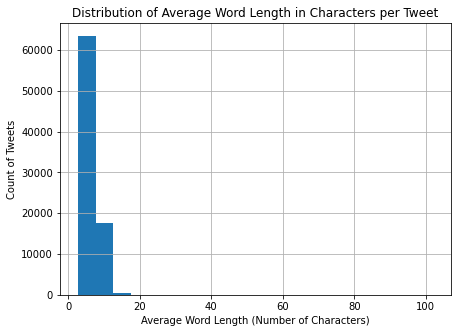

In [12]:
# Checking the number of characters for each word in the Tweet using the  'separate_words' variable which was
#  defined in the 1st plot
char_len = separate_words.apply(lambda x : [len(i) for i in x])

# Getting the mean of the number of characters in each word
avg_word_len = char_len.map(lambda x: np.mean(x))

# Improve plot comprehensiveness
plt.figure(figsize=(7,5))
plt.hist(avg_word_len, bins = 20)
plt.xlabel('Average Word Length (Number of Characters)')
plt.ylabel('Count of Tweets')
plt.title('Distribution of Average Word Length in Characters per Tweet')

# call a grid to improve legibility
plt.grid()
plt.show()


We can see that on average the word length is less than 10 characters, however similar to last time there are outliers. These outliers are likely formed by the chain of entity 'mentions' without spaces, hence counted as 1 word. 

The majority of the data is below 20 characters so let's generate a plot with the average word length of less than 16 characters to see a better representation of the data. <a id="7"></a>

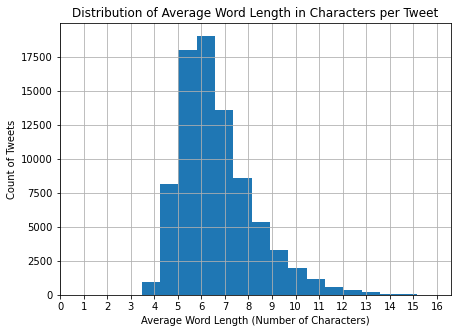

In [13]:
# Checking the number of characters for each word in the Tweet using the  'separate_words' variable which was
#  defined in the 1st plot
char_len = separate_words.apply(lambda x : [len(i) for i in x])

# Getting the mean of the number of characters in each word
avg_word_len = char_len.map(lambda x: np.mean(x))

# Limit the data to only show means of less than 16 characters
avg_word_len = avg_word_len[avg_word_len <16]
ticks = np.arange(17)

# Improve plot comprehensiveness
plt.figure(figsize=(7,5))
plt.hist(avg_word_len, bins=17)
plt.xlabel('Average Word Length (Number of Characters)')
plt.ylabel('Count of Tweets')
plt.title('Distribution of Average Word Length in Characters per Tweet')
plt.xticks(ticks)

# call a grid to improve legibility
plt.grid()
plt.show()


The majority of the average length of words in Tweets range from 5 to 7 characters though the overall range can be from 3-15 characters.

## Corpus EDA
Now that we have conducted an EDA for the composition of a Tweet, let's explore the actual words within Tweets. The first step is to remove the 'Stop Words' which is done below.

### Stop Word Removal
The stop words are small connecting words such as 'to', 'is' etc. These words can hinder with Topic Modeling as they are highly prevalent in the English language use and will show up as most frequently used words. To avoid this, we will remove them from the Tweets. It should be noted that removing these words will not affect the meaning of a sentence by much. 

The method employed for stop word removal is using the Natural Language Toolkit which contains a corpus of stop words for different languages. As we are only using English Tweets, we will only employ English stop words to be removed. 



In [14]:
# Generating a set of English stop words using nltk
stopwords_corpus=set(stopwords.words('english'))

Below we will plot a corpus of the stop words used in our Tweets and check the distribution of the top 10 stop words used. A `defaultdict` function is being used which creates an empty dictionary. This dictionary takes every new word as a key and appends the value for any existing key words that it encounters again by adding 1.

In [15]:
# Generate an empty list called base_corpus
base_corpus=[]

# Split each Tweet into separate words
split_sentence= analysis_df['text'].str.split()

# Generate a list of each separate Tweet
split_sentence=split_sentence.values.tolist()

# Convert list of Tweet word lists into single list of words 
base_corpus = [split for i in split_sentence for split in i]

# Generating dictionary of stop words
stop_words_dic=defaultdict(int)
for split in base_corpus:
    if split in stopwords_corpus:
        stop_words_dic[split]+=1

Let's have a look at the corpus generated below. 

In [16]:
base_corpus

['“People',
 'are',
 'just',
 'storing',
 'up.',
 'They',
 'are',
 'staying',
 'at',
 'home',
 'freezing',
 'things.',
 'I',
 'talk',
 'to',
 'dealers',
 'around',
 'the',
 'state',
 'and',
 'out',
 'of',
 'the',
 'area,',
 'they',
 'are',
 'all',
 'out',
 'of',
 'freezers,”',
 'said',
 'owner',
 'Frank',
 'Mertz.',
 'https://t.co/gsqghMqJs9',
 '@KQDS_FOX21',
 '#minneapolis',
 '#mn',
 '#covid19',
 '#coronavirus',
 'Dez-Ann',
 'Romain',
 'was',
 'a',
 'beloved',
 'school',
 'principal.',
 'Floyd',
 'Cardoz',
 'was',
 'a',
 'chef',
 '(and',
 'won',
 'Top',
 'Chef).',
 'Rabbi',
 'Romi',
 'Cohn',
 'fought',
 'the',
 'Nazis.',
 'Jenny',
 'Polanco',
 'was',
 'a',
 'fashion',
 'designer.',
 'Terence',
 'McNally',
 'was',
 'a',
 'renowned',
 'playwright.',
 'They',
 'lost',
 'their',
 'lives',
 'to',
 '#COVID19',
 'this',
 'week.',
 'https://t.co/IzN4mGXEdO',
 'As',
 'part',
 'of',
 'your',
 'everyday',
 '#prevention',
 'actions',
 'clean',
 'and',
 'disinfect',
 'frequently',
 'touched',
 'su

Below we can see that our base corpus contains over 2.2 million terms.

In [17]:
# Checking the length of the base_corpus which will give the number of elements (terms) in it.  
len(base_corpus)

2236079

Let's plot the top 10 stop words below. We will take the key value pairs from stop_words_dic and find the top 10 most used by sorting the values in a reverse order. <a id="8"></a>

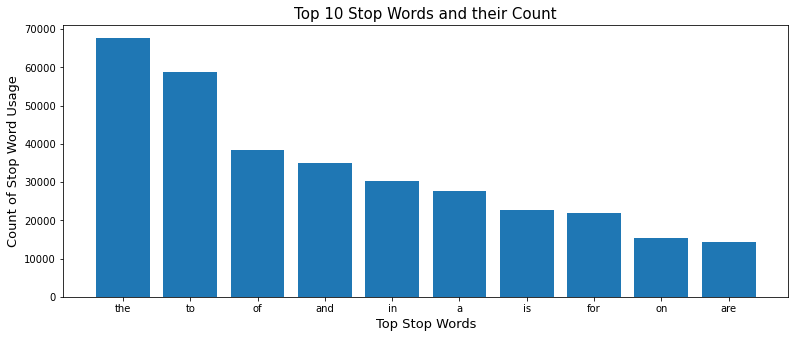

In [18]:
# Generate a variable called top_10_stop_words which has the words used against the number of times each word is used. 
# sort the variable in reverse order and look at the top 10 entries based on values
top_10_stop_words=sorted(stop_words_dic.items(), key=lambda y:y[1],reverse=True)[:10] 

# Zip the result of the tuple as x and y
x,y=zip(*top_10_stop_words)

# Instantiate the plot
plt.figure(figsize = (13,5))

# Plot the variables x and y
plt.bar(x,y)

# Improve plot comprehensiveness
plt.xlabel('Top Stop Words', size = 13)
plt.ylabel('Count of Stop Word Usage', size = 13)
plt.title('Top 10 Stop Words and their Count', size = 15)
plt.show()

### Most Used Tokens

Now that the stop words have been removed, let's check the most commonly used tokens and their counts. 

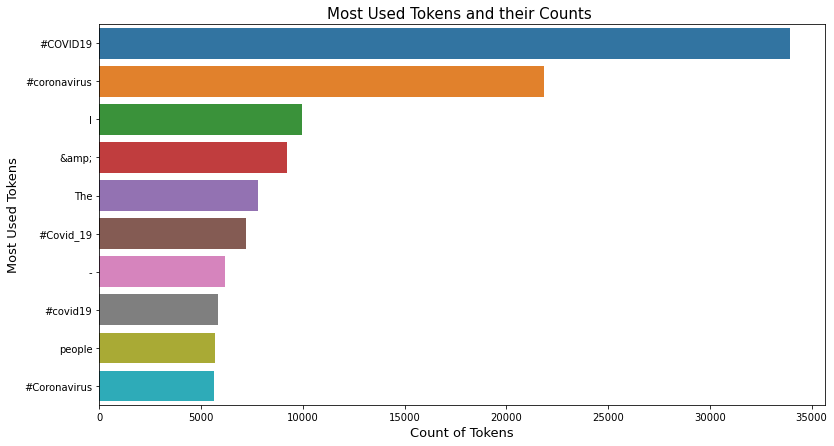

In [19]:
# Use counter to count the number of words in the base_corpus
word_counter=Counter(base_corpus)

# Find the most used words
most_words=word_counter.most_common()

# Create empty lists to add the results
x, y= [], []

# Use a for loop to to count the top 41 most used words
for non_stop_word,count in most_words[:41]:
    
    # filter the stop words from the top 41 words
    if (non_stop_word not in stopwords_corpus):
        
        # Append x and y variables with the words and their counts
        y.append(non_stop_word)
        x.append(count)
        
# # Instantiate the plot
plt.figure(figsize = (13,7))     

# Plot the variables x and y
sns.barplot(x=x,y=y)

# Improve plot comprehensiveness
plt.xlabel('Count of Tokens', size = 13)
plt.ylabel('Most Used Tokens', size = 13)
plt.title('Most Used Tokens and their Counts ', size = 15)
plt.show()

We can see that 5 out of the 10 top words show synonyms of Covid19. A function is defined below to convert all of the synonyms of covids into a singular changed word.

In [20]:
def covid_synonym_changer(corpus, changed): 
    """
    Takes a corpora as a list of lists as the first variable, and string as a second variable.
    Changes the tokens starting with specific strings into a given string (second variable).
    
    """
    
    # Ensure that variable 'changed' is a string
    assert isinstance(changed, str),  "Input variable 'changed' should be string"
    
    # Create an empty list that will be appended by the terms starting with a specific string 
    Covid_synonyms = []
    [Covid_synonyms.append(word) for word in base_corpus if word.startswith('#Covi')]
    [Covid_synonyms.append(word) for word in base_corpus if word.startswith('#Coro')]
    [Covid_synonyms.append(word) for word in base_corpus if word.startswith('Covi')]
    [Covid_synonyms.append(word) for word in base_corpus if word.startswith('Coro')]    

    # Find the distinct terms starting from the string and print them
    Covid_synonyms_set = set(Covid_synonyms)
    print(f'The unique Covid19 synonyms are:\n')
    print(Covid_synonyms_set)

    # Create a list of the distinct terms
    Covid_synonyms_list = list(Covid_synonyms_set)
    
    #Create an empty list that will be appended by any terms that are being changed to keep track of the terms
    corpus = []

    # Create a for loop that iterates through the base_corpus and makes every term lowercase
    # The lowercase terms are then changed if the start with the given string  
    for word in base_corpus:
        word = word.lower()
        if word.startswith('#Covi'):
            word = changed
        elif word.startswith('#Coro'):
            word = changed
        elif word.startswith('covi'):
            word = changed
        elif word.startswith('coro'):
            word = changed
        elif word.startswith('#covi'):
            word = changed
        elif word.startswith('#coro'):
            word = changed
            
        # Append the corpus to keep track of the terms
        corpus.append(word)
    
    # Print the word that the terms are being changed to  
    print(f'\n\n They have been changed to {changed}')
        
    # Return the terms that are being changed
    return corpus

Let's use the function below to change the synonyms to a single term.

In [21]:
# Assign the synonym changed bases corpus to the variable corpus
corpus = covid_synonym_changer(base_corpus, 'Covid19')

The unique Covid19 synonyms are:

{'Coronavirus..Hypertension', '#CoronaVirusPandemic🦠🖕🏻#tRUmpWillKillUsALL🚨', '#CoronavirusBill', '#CoronavirusTotalCases', '#CoronaVirus..', '#CoronavirusCoverup', '#CoronaInAfghanistan', '#CoronavirusPandemic🧟\u200d♂️🦠', 'Coronav...', '#CoronaVirusus', '#Coronavirusupdate:', 'CoronaSubway', '#CoronaVirusMalta', '#CoronavirusOutbreak...there', '#Covid_19,&amp;', '#Covid19???', '#Covid19????????', '#CoronaVirusIII', '#CoronavirusPandemicUSA', 'Covid-19.', '#Covid19australia:', 'Coronavirus-follower', "Coronavirus?!'", '#Coronavirusspain', '#Covid19turkey', '#Coronavirus🦠#StaySafe', '#Covid-19India', '#CovidCut!', '#CoronaVirusEnChile', 'Covidiot', '#CoronaIndia', '#CoronavirusRelief', '#Coronavirus🙏🏾', 'Corona,', '#CoronaHoax™', '#CoronaVirusUpdate', '#CovidIsNoWorseThanTheFlu', '#Covid19Ethiopia', '#CoronavirusMemes', '#Coronavirus(COVID19)', 'Corona?', '#Covid19-Inspired', 'Coronavirus..says', '#Coronaindia', 'Corona-cation', '#Covid19Lebanon', 'Covid



 They have been changed to Covid19


Now that the synonyms are unified, let's define a function to remove the stop words from the corpus. 

In [22]:
def stopword_removal(corpus):
    """
    Takes a corpora as a list of lists as a variable. Removes any terms from the corpora if they are in a predefined 
    stopword corpus.
    
    """
    
    # Iterates through the corpus getting the index and term 
    for ind, word in enumerate(corpus):
        
        # If the term is present in the stopword_corpus 
        if word in stopwords_corpus:
            
            # Use the index to remove the word from the corpus
            corpus.pop(ind)
            
        

def ensure_removal(corpus):
    """
    Takes a corpora as a list of lists as a variable. Removes any terms from the corpora if they are in a predefined 
    stopword corpus.
    
    """
    
    # Create an empty list 
    should_be_empty = []
    
    # Iterates through the corpus getting the index and term 
    for ind, word in enumerate(corpus):
        
        # If the term is present in the stopword_corpus 
        if word in stopwords_corpus:
            
            # append the empty list with the word
            should_be_empty.append(word)
            
    # While the length of the list is bigger than 0 
    while len(should_be_empty) > 0:  
        
        # Run the predefined function 'stopword_removal' to remove words from the corpus
        stopword_removal(corpus)
        
        # Empty the list after running 'stopword_removal'
        del should_be_empty[:]
        
        # Rerun this function 
        ensure_removal(corpus) 
            

The defined function is used below to remove the stop words from the corpus. 

In [23]:
# Use the defined function to remove stop words from the corpus
ensure_removal(corpus)

We can see below that the first 10 terms in the base_corpus contain 'are', 'just' and 'they' whereas these are removed in our corpus.

In [24]:
# Print the original Tweet from the Dataframe and the preprocessed version to compare
print("First 10 terms base_corpus:", base_corpus[0:10])
print("_______________________________________________________________________________________________________________________________________________\n")
print("First 10 terms corpus with removal:", corpus[0:10])

First 10 terms base_corpus: ['“People', 'are', 'just', 'storing', 'up.', 'They', 'are', 'staying', 'at', 'home']
_______________________________________________________________________________________________________________________________________________

First 10 terms corpus with removal: ['“people', 'storing', 'up.', 'staying', 'home', 'freezing', 'things.', 'talk', 'dealers', 'around']


Let's check the difference in length of the 2 corpus.

In [25]:
print(f'{len(base_corpus)} is the number of elements in the base corpus whereas {len(corpus)} is the number of elements in the corpus with removal.')

2236079 is the number of elements in the base corpus whereas 1504296 is the number of elements in the corpus with removal.


Let's plot the most used tokens in the the processed corpus now that the stop words have been removed. <a id="9"></a>

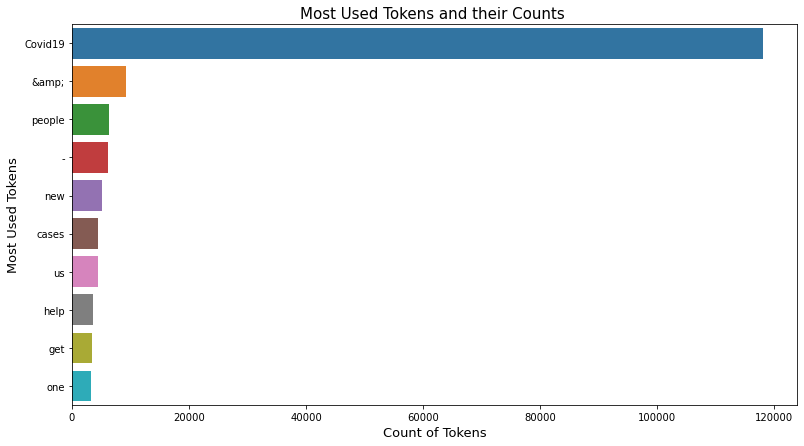

In [26]:
# Use counter to count the number of words in the corpus
word_counter=Counter(corpus)

# Find the most used words
most_words=word_counter.most_common()

# Create empty lists to add the results
x, y= [], []

# Use a for loop to to count the top 10 most used words
for word,count in most_words[:10]:
    
    # Append x and y variables with the words and their counts
    y.append(word)
    x.append(count)
    
# Instantiate the plot   
plt.figure(figsize = (13,7))  

# Plot the variables x and y
sns.barplot(x=x,y=y)

# Improve plot comprehensiveness
plt.xlabel('Count of Tokens', size = 13)
plt.ylabel('Most Used Tokens', size = 13)
plt.title('Most Used Tokens and their Counts ', size = 15)
plt.show()


Most used words after combining synonyms of Covid19 shows 'Covid19', 'people', 'new', 'us', 'cases', 'need', 'help', 'health'. The second most used token is the ampersand which we will have to remember to remove during the preprocessing for the models. Now let's analyse the top n-grams. We will start by defining a function to get the top n-grams for the corpus. 

In [27]:
def get_top_ngram(corpora, n=None):
    """
    Takes a corpora as a list of lists as variable 1 and an integer for number of n-grams as variable 2.
    
    """
    # Ensure that variable 'n' is an integer
    assert isinstance(n, int),  "Input variable 'n' should be an integer"
    
    # Instantiate the CountVectorizer with the given 'n' as a n-gram value
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpora)
    
    #  Vectorize the tokens in the corpora with the instantiated vectorizer
    bag_of_words = vec.transform(corpora)
    
    # Get the total number of tokens
    sum_words = bag_of_words.sum(axis=0) 
    
    # Create a word(s) frequency for every token in the vectorizer
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    
    # Sort the word(s) frequency
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    # Return the top 10 word frequencies after they are sorted
    return words_freq[:10]

Let's utilize the defined function and plot the bigrams from our corpus. <a id="10"></a>

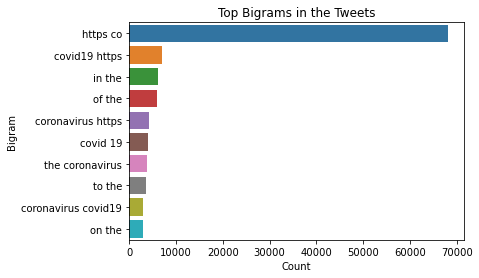

In [28]:
# Get the top bi-grams 
top_bi_grams=get_top_ngram(analysis_df['text'],n=2)

# Populate the variables with the top bi-grams
y,x=map(list,zip(*top_bi_grams))


# Instantiate the plot   
plt.figure()

# Plot the variables x and y
sns.barplot(x=x,y=y)

# Improve plot comprehensiveness
plt.xlabel("Count")
plt.ylabel("Bigram")
plt.title("Top Bigrams in the Tweets")
plt.show()

We can see that a lot of the top 10 bigrams contain variations of a synonym of Covid19 with a part of a link. Let's see if this changes with trigrams below.

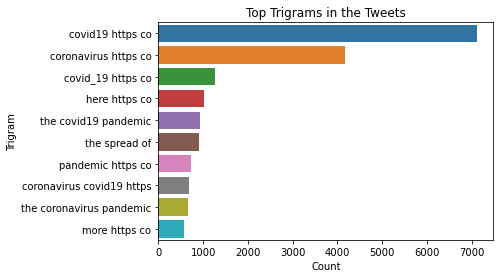

In [29]:
# Get the top bi-grams 
top_tri_grams=get_top_ngram(analysis_df['text'],n=3)

# Populate the variables with the top bi-grams
y,x=map(list,zip(*top_tri_grams))


# Instantiate the plot   
plt.figure()

# Plot the variables x and y
sns.barplot(x=x,y=y)

# Improve plot comprehensiveness
plt.xlabel("Count")
plt.ylabel("Trigram")
plt.title("Top Trigrams in the Tweets")
plt.show()

The top 10 trigrams still show variations of a synonym of Covid19 with a part of a link and another word. This shows that we have to actively remove the links in the preprocessing for the modeling. 

## Tweet Exploratory Data Analysis Conclusion
We can see from the above analysis that Tweets are very variable. While majority of them are [between 15-35](#4) words and [100-280 characters](#5), there is a long tail where Tweets can go upwards of 90 words and 850 characters. These outliers are formed of specific Tweets where the [number of 'mentions' are high and usually sharing website links](#6). On average the Tweets contain words which have [5-6 characters](#7) and hence confirm the use of a simpler vernacular. 

Once the stop words were removed and counted we saw that the [top 3 most common stop words](#8) were `the`, `to` and `of`. The most common tokens are synonyms of Covid19, and once they are aggregated and changed to just be `Covid19` then [the most common tokens](#9) are `Covid19`(understandably), `&amp` and `people`. When considering [bigrams](#10), the most common tokens include synonyms of Covid19 with a `https`. This shows that links are very common in the dataset and may have to be removed for Topic Modeling. 

While the most common tokens may seem to not be a useful EDA result, they have actually been incredibly beneficial in making decisions for our next part. We have learnt that:
 - The Tweets need to be cleaned by removing `stop words`, `links`, `&amp`, `dashes` and `dots`
 - The Tweets have a lot of synonyms for Covid19 such as 'covid_19', 'coronavirus' or ' covid' which *may* need to be aggregated and changed to a singular word
 - The 'mentions' using `@` *may* have to be removed
 
The Topic Modeling will be covered in the next notebook. While the workflow in this notebook has involved cleaning the text data, we will not be exporting the results from this notebook to use them in the next part. This is because the structure of the corpus being used in the Topic Modeling is different. We have, however, made some really important strides in cleaning the data, and that code will be copied over to the next part. Ideally, if this was being done in the same notebook, then the functions we have defined earlier, to clean the data, could be used directly.  